In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

data = ride_data.merge(city_data, on='city')

# Display the data table for preview
data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

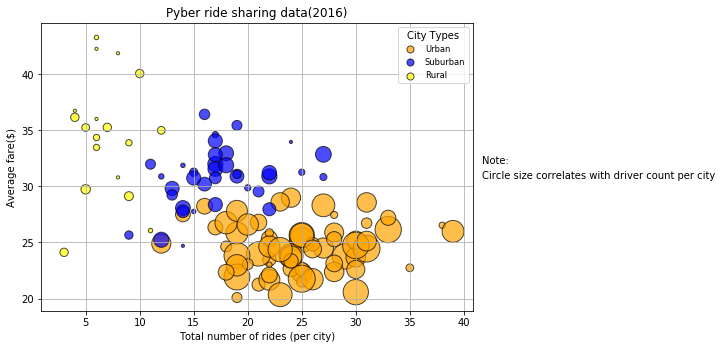

In [2]:
# Obtain the x and y coordinates for each of the three city types
city_group = data.groupby(by='city')
x = city_group['ride_id'].count()
y = city_group['fare'].mean()

# Function to get scatter color per city type
def apply_color(x):
    if (x=='Urban'): 
        return 'orange'
    elif (x=='Rural'):
        return 'yellow'
    else:
        return 'blue'


# Build the scatter plots for each city types
size = (city_group['driver_count'].first())*10
city_type = city_group['type'].first()
unique_type = city_type.unique()
city_color = city_type.apply(apply_color)
unique_colors = city_color.unique()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for i, val in enumerate(unique_type):
    xi = [x[j] for j in range(len(x)) if val == city_type[j] ]
    yi = [y[j] for j in range(len(y)) if val == city_type[j] ]
    sizei = [size[j] for j in range(len(size)) if val == city_type[j]]
    plt.scatter(xi, yi, s=sizei, edgecolors='black',alpha=0.7, c=unique_colors[i],label=val)
    
    
# Incorporate the other graph properties
plt.title('Pyber ride sharing data(2016)')
plt.xlabel('Total number of rides (per city)')
plt.ylabel('Average fare($)')
plt.grid(True)

# Create a legend and set legend size to be same
lgd = plt.legend(title='City Types', fontsize='small')
for handle in lgd.legendHandles:
    handle.set_sizes([50.0])
    
# Incorporate a text label regarding circle size

plt.text(1.02,0.52,'Note:',horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)
plt.text(1.02,0.47,'Circle size correlates with driver count per city',horizontalalignment='left',verticalalignment='center',transform=ax.transAxes)


# Save Figure
plt.savefig('Images/Pyber-Scatter.jpg',bbox_inches='tight')

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

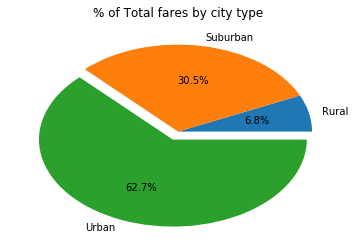

In [4]:
# Calculate Type Percents
type_group = data.groupby(by='type')
fares = type_group['fare'].sum()
types = type_group['type'].first()

explode = []
for i, val in enumerate(types):    
    explode.append(0.1) if val == 'Urban' else explode.append(0)
  
# Build Pie Chart
plt.pie(fares,autopct="%.1f%%",labels=types,explode=explode)
plt.title('% of Total fares by city type')

# Save Figure
plt.savefig('Images/Pyber-Pie-fare.jpg',bbox_inches='tight')


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

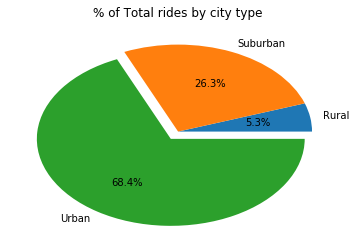

In [6]:
# Calculate Ride Percents
type_group = data.groupby(by='type')
rides = type_group['fare'].count()
types = type_group['type'].first()

explode = []
for i, val in enumerate(types):    
    explode.append(0.1) if val == 'Urban' else explode.append(0)
  
# Build Pie Chart
plt.pie(rides,autopct="%.1f%%",labels=types,explode=explode)
plt.title('% of Total rides by city type')

# Save Figure
plt.savefig('Images/Pyber-Pie-rides.jpg',bbox_inches='tight')


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

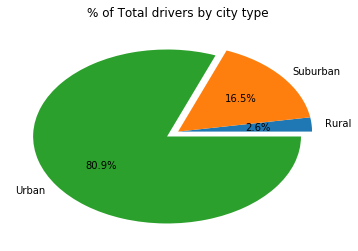

In [8]:
# Calculate Driver Percents

city_group = data.groupby(by='city')
city_group['driver_count'].first()

# Creating dataframe to capture number of drivers and city types
dr_count_df = pd.DataFrame({'driver_count': city_group['driver_count'].first(),
              'city_type': city_group['type'].first()})

dr_group = dr_count_df.groupby('city_type')
dr_total = dr_group['driver_count'].sum()

types = dr_group['city_type'].first()

explode = []
for i, val in enumerate(types):    
    explode.append(0.1) if val == 'Urban' else explode.append(0)
  
# Build Pie Chart
plt.pie(dr_total,autopct="%.1f%%",labels=types,explode=explode)
plt.title('% of Total drivers by city type')

# Save Figure
plt.savefig('Images/Pyber-Pie-drivers.jpg',bbox_inches='tight')



In [9]:
# Show Figure
plt.show()